**DSCI 100 006 Group 38 Proposal**

**Title**: Predicting the likelihood of heart disease within a patient using 5 different factors.

**Introduction:**

The background information on the topic:
The dataset that we will be using for this project is one related to heart disease and the factors that contribute towards it. Different factors such as blood pressure, cholesterol and even age can have great impacts on the risk of contracting heart disease and so this data set provides past details of patients with attributes they had and whether or not they were healthy or not.

The question we will try to answer with our project:
The question that we will be addressing for our group project is, how do the age, sex, cholesterol, max heart rate, and resting blood pressure factors affect the likelihood of developing heart disease?

The dataset that we will use to answer the question:
Using a dataset found at this link, https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/, the data from the Cleveland dataset will be used. The original dataset contains 76 factors, however, the processed data, which is what will be used in our project, contains the following 14 factors:
Age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG, max heart rate, exercise-induced angina, oldpeak, slope, number of vessels coloured, thalassemia and the predicting class for if the patient is healthy or with heart-disease. We will further filter this data to be the 5 factors that we will be examining.

**Preliminary exploratory data analysis:**

Demonstrate that the dataset can be read from the web into R 
<br>Clean and wrangle your data into a tidy format
<br>Using only training data, summarize the data in at least one table (this is exploratory data analysis). 
 - An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

<br>Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis).
- An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [23]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [84]:
heart_data<- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"), col_names = FALSE) |>
    select(X1, X2, X4, X5, X8, X14)
colnames(heart_data) <- make.names(c("age", "sex", "restbps", "cholesterol", "maxbpm", "health"))

heart_data["health"][heart_data["health"] == 2 | heart_data["health"] == 3 | heart_data["health"] == 4] <- 1
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,restbps,cholesterol,maxbpm,health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,130,131,115,1
57,0,130,236,174,1
38,1,138,175,173,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



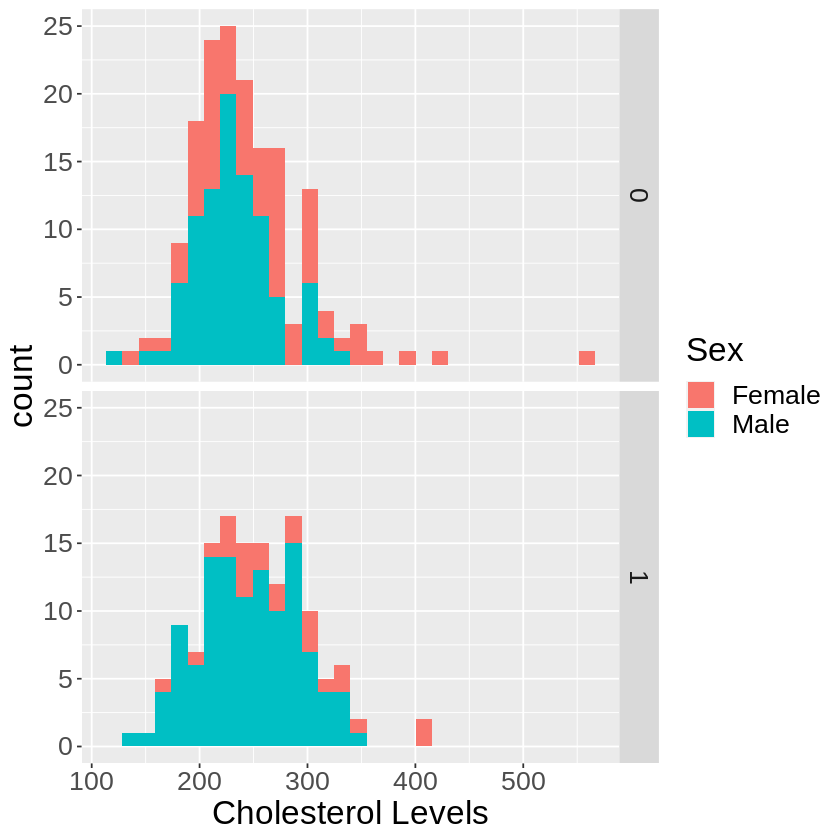

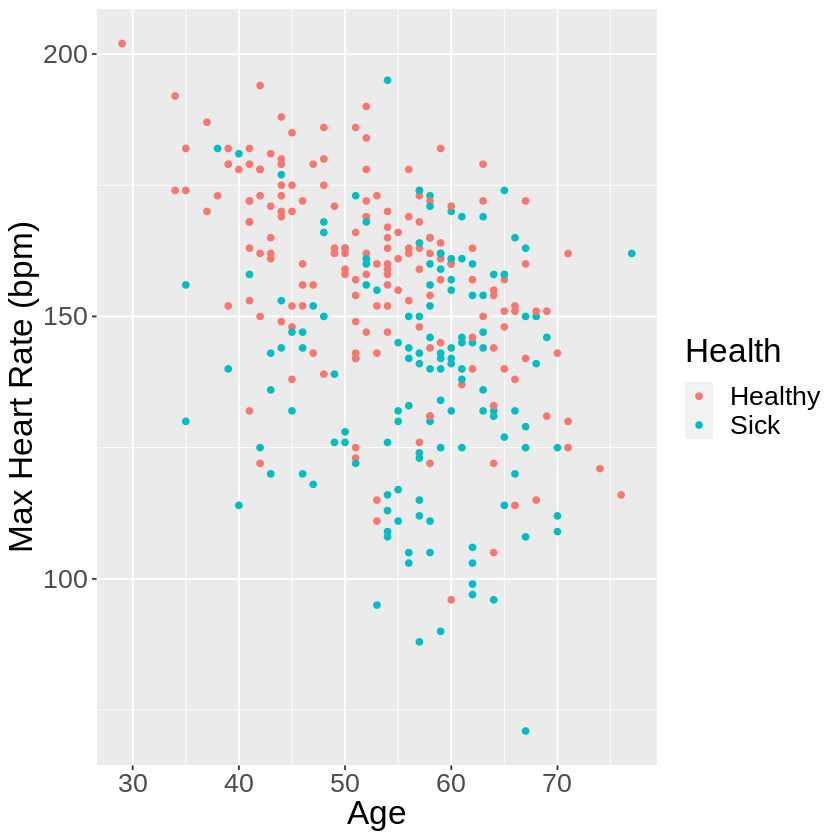

In [89]:
heart_data_plot <- heart_data |>
    ggplot(aes(x = cholesterol, fill = as_factor(sex))) +
    geom_histogram() +
    facet_grid(rows = vars(health)) +
    labs(x = "Cholesterol Levels", fill = "Sex") +
    scale_fill_discrete(labels = c("Female", "Male")) +
    theme(text = element_text(size = 20))
heart_data_plot

heart_data_plot2 <- heart_data |>
    ggplot(aes(x = age, y = maxbpm, colour = as_factor(health))) +
    geom_point() +
    labs(x = "Age", y = "Max Heart Rate (bpm)", colour = "Health") +
    scale_colour_discrete(labels = c("Healthy", "Sick")) +
    theme(text = element_text(size = 20))
heart_data_plot2

**Methods:**

From the dataset that we have retrieved on heart data, it is already a processed dataset as mentioned before, with 14 factors instead of 76, however we will not be making use of all these 14 factors, and instead only 5. Therefore, we have decided to filter it to be only the age, sex, resting blood pressure, cholesterol, max heart rate factors.

With these factors, we plan to make several visualisations to clearly see the relationship different variables have on each other, if it even exists. To be more specific we could make a scatterplot visualisation, with the cholesterol on the x-axis and blood pressure on the y-axis. Another potential visualisation is to check how age and the patient's max heart rate are influenced by each other. This scatterplot can be used to see the trend between these two variables. Both these visualisations can have the points coloured based on whether the patient was deemed healthy or sick.

Make scatter plots according to the factors:
Use the likelihood of heart disease as the vertical axis and ages(cholesterol, max heart rate, and resting blood pressure) in the horizontal axis, color the point by sex.
Find the relationship between the factors and likelihood of heart disease

**Expected outcomes and significance:**

We expect to find a clear relationship between the factors, such as a higher cholesterol level, or high blood pressure, resulting in a higher risk of developing heart disease. This could also be applied to the other factors, with how age can affect blood pressure and cholesterol levels, and consequently run the risk of developing heart disease. One factor that would be interesting to understand is if there is any significance in the sex of a person when studying heart disease, and if it is more likely for male patients to develop heart disease in comparison to female patients, and vice versa.

The impact that such findings could have are quite great as it allows people to be better prepared for such scenarios, and can potentially prevent heart disease from developing entirely if they find, for instance, their resting blood pressure to be in a sort of "danger" zone in terms of contracting heart disease. Especially with the elderly, they can try and live a lifestyle that doesn't put them in a position where heart disease is a more than likely occurrence.

These findings could have a great impact on future research such as what potential treatments are there to help prevent these diseases before they happen, in terms of lowering cholesterol levels, reducing resting blood pressure, and the like.